In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Numerical Data

In [3]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [11]:
X_train.tail()

,Age,Fare,Age_imputed
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0
102,21.0,77.2875,21.0


In [12]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [13]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,18.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


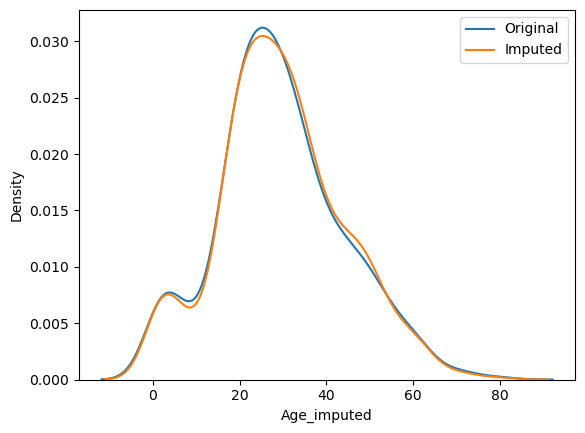

In [16]:
sns.distplot(X_train['Age'], label = 'Original', hist = False)
sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist = False)

plt.legend()
plt.show()

In [17]:
print('Original variable variance:', X_train['Age'].var())
print('Imputed variable variance:', X_train['Age_imputed'].var())

Original variable variance: 210.2517072477438
Imputed variable variance: 205.0676989283569


In [18]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,62.600986
Age,71.580633,210.251707,210.251707
Age_imputed,62.600986,210.251707,205.067699


<Axes: >

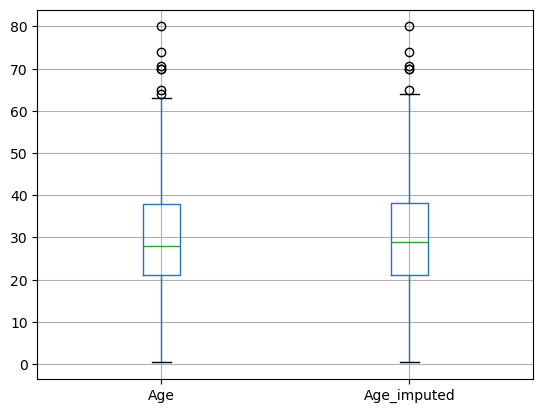

In [19]:
X_train[['Age','Age_imputed']].boxplot()

# Categorical data

In [22]:
df = pd.read_csv('house-train.csv', usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [23]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [25]:
X = df
y = df['SalePrice']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [28]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
170,NaN,TA,128500,TA,NaN
1,TA,TA,181500,TA,TA
94,NaN,TA,204750,TA,NaN
175,Gd,TA,243000,TA,Gd
210,NaN,NaN,98000,NaN,NaN


In [29]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [31]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
144,NaN,TA,125000,TA,TA
122,NaN,TA,136000,TA,TA
994,Gd,TA,337500,TA,Gd
511,Gd,TA,202665,TA,Gd
1391,NaN,TA,124000,TA,Gd


In [32]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train['GarageQual_imputed'].dropna()),
    ],
    axis = 1)

temp.columns = ['original','imputed']

In [33]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [34]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train['FireplaceQu_imputed'].dropna()),
    ],
    axis = 1)

temp.columns = ['original','imputed']

In [35]:
temp

,original,imputed
Gd,0.494272,0.501712
TA,0.412439,0.405822
Fa,0.040917,0.040240
Po,0.027823,0.027397
Ex,0.024550,0.024829


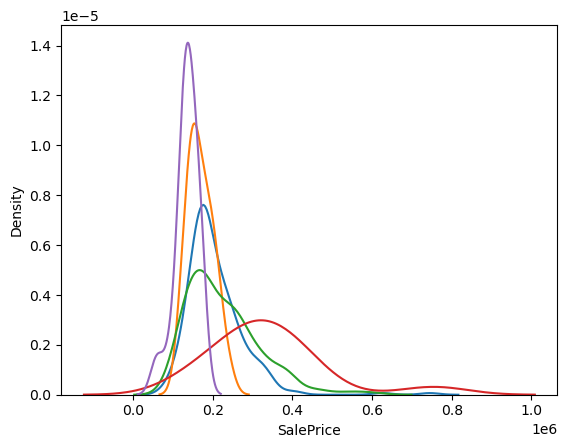

In [36]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist = False, label = category)
plt.show()

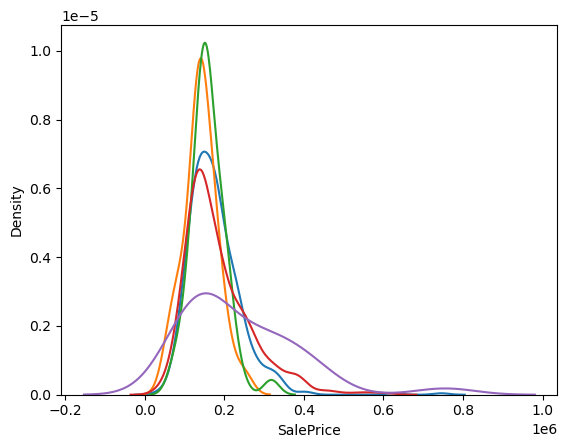

In [37]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist = False, label = category)
plt.show()

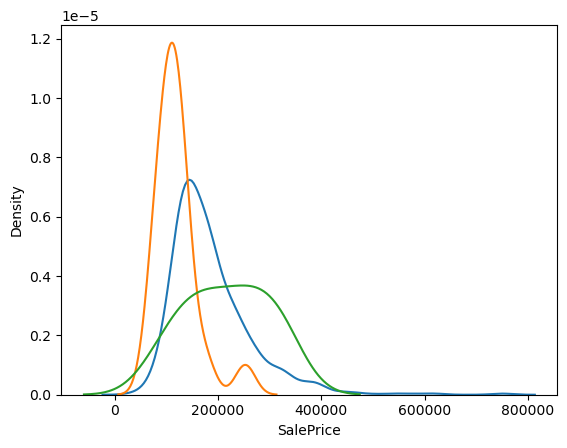

In [38]:
for category in X_train['GarageQual'].dropna().unique():
    sns.distplot(X_train[X_train['GarageQual'] == category]['SalePrice'], hist = False, label = category)
plt.show()

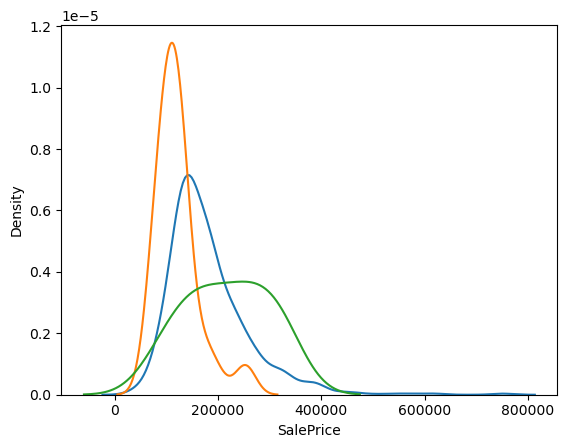

In [39]:
for category in X_train['GarageQual_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['GarageQual_imputed'] == category]['SalePrice'], hist = False, label = category)
plt.show()